# Generate surrogate data and simulate neuron spiking.

In this file, we generate surrogate data and simulating neuron spiking process to get ground turth for following experiments.

## Generate neural arrays and generation of sets of random assemblies
    1. Generate a hexagonal lattice of unit spacing, in which a neuron was placed at every lattice point.
    2. Draw points to get an assembly by:
        (1) Random generate points.
        (2) Calculate closest neural
        (3) If the distance smaller than a throshold, get that neural into assemblies.
    3.  Repeat 2 to get multiple assemblies.
    

In [1]:
from coniii import *
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import random

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:381: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterate_neighbors(n,ix,expdJ,r):
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:2342: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cross(vec1, vec2):


In [2]:
# define parameters
T = 3600 # time of simulation
N = 81  # number of neurons
dT = 0.5 # time step
params_assembly_density = 4 # size of neurons in each assembly 小黑点的最大数量
params_assembly_num = 10 # number of assemblies
params_point_into_neuron_distance = 0.5 # neuro和黑点值的threshold
fire_rate_background = np.random.uniform(1, 6, N)

In [3]:
# Function to create a neuron array using unit-spacing hexagonal lattice points neuro坐标
def create_neuron_array(num_neurons):
    coords = []
    num_rows = int(np.sqrt(num_neurons))
    num_cols = num_rows
    for i in range(num_rows):
        for j in range(num_cols):
            x = j + 0.5 * (i % 2)  # Stagger every other row to create hexagonal pattern
            y = i * np.sqrt(3) / 2  # Scale row spacing by sqrt(3)/2 to create hexagonal pattern
            coords.append((x, y))
    return np.array(coords)

In [4]:
# Function to create an assembly of neurons创建assemly
def create_assembly(neuron_coords, num_points, mean, std_dev):
    # Create the covariance matrix
    cov_matrix = np.eye(2) * std_dev**2
    # Draw points from a two-dimensional normal distribution
    points = np.random.multivariate_normal(mean, cov_matrix, num_points)
    # Find the closest neuron to each drawn point
    distances = cdist(points, neuron_coords)
    closest_neurons = np.argmin(distances, axis=1)
    # If the distance from the neuron to the drawn point is less than 0.5, it is considered part of the assembly
    assembly_neurons = neuron_coords[closest_neurons[distances[np.arange(len(closest_neurons)), closest_neurons] < 0.5]]
    print("Number of neurons in assembly: ", len(assembly_neurons))
    print("Neurons in assembly:\n ", assembly_neurons)
    return assembly_neurons

Number of neurons in assembly:  3
Neurons in assembly:
  [[6.5        2.59807621]
 [8.5        6.06217783]
 [8.         3.46410162]]
Number of neurons in assembly:  3
Neurons in assembly:
  [[2.         6.92820323]
 [2.5        6.06217783]
 [1.5        6.06217783]]
Number of neurons in assembly:  3
Neurons in assembly:
  [[2.5        4.33012702]
 [2.         5.19615242]
 [2.5        4.33012702]]
Number of neurons in assembly:  3
Neurons in assembly:
  [[4.5        2.59807621]
 [5.5        0.8660254 ]
 [5.5        0.8660254 ]]
Number of neurons in assembly:  4
Neurons in assembly:
  [[6.5        4.33012702]
 [4.5        4.33012702]
 [3.5        2.59807621]
 [4.5        4.33012702]]
Number of neurons in assembly:  3
Neurons in assembly:
  [[3.         1.73205081]
 [1.5        0.8660254 ]
 [0.         1.73205081]]
Number of neurons in assembly:  4
Neurons in assembly:
  [[0.5        2.59807621]
 [1.5        4.33012702]
 [1.5        4.33012702]
 [2.         1.73205081]]
Number of neurons i

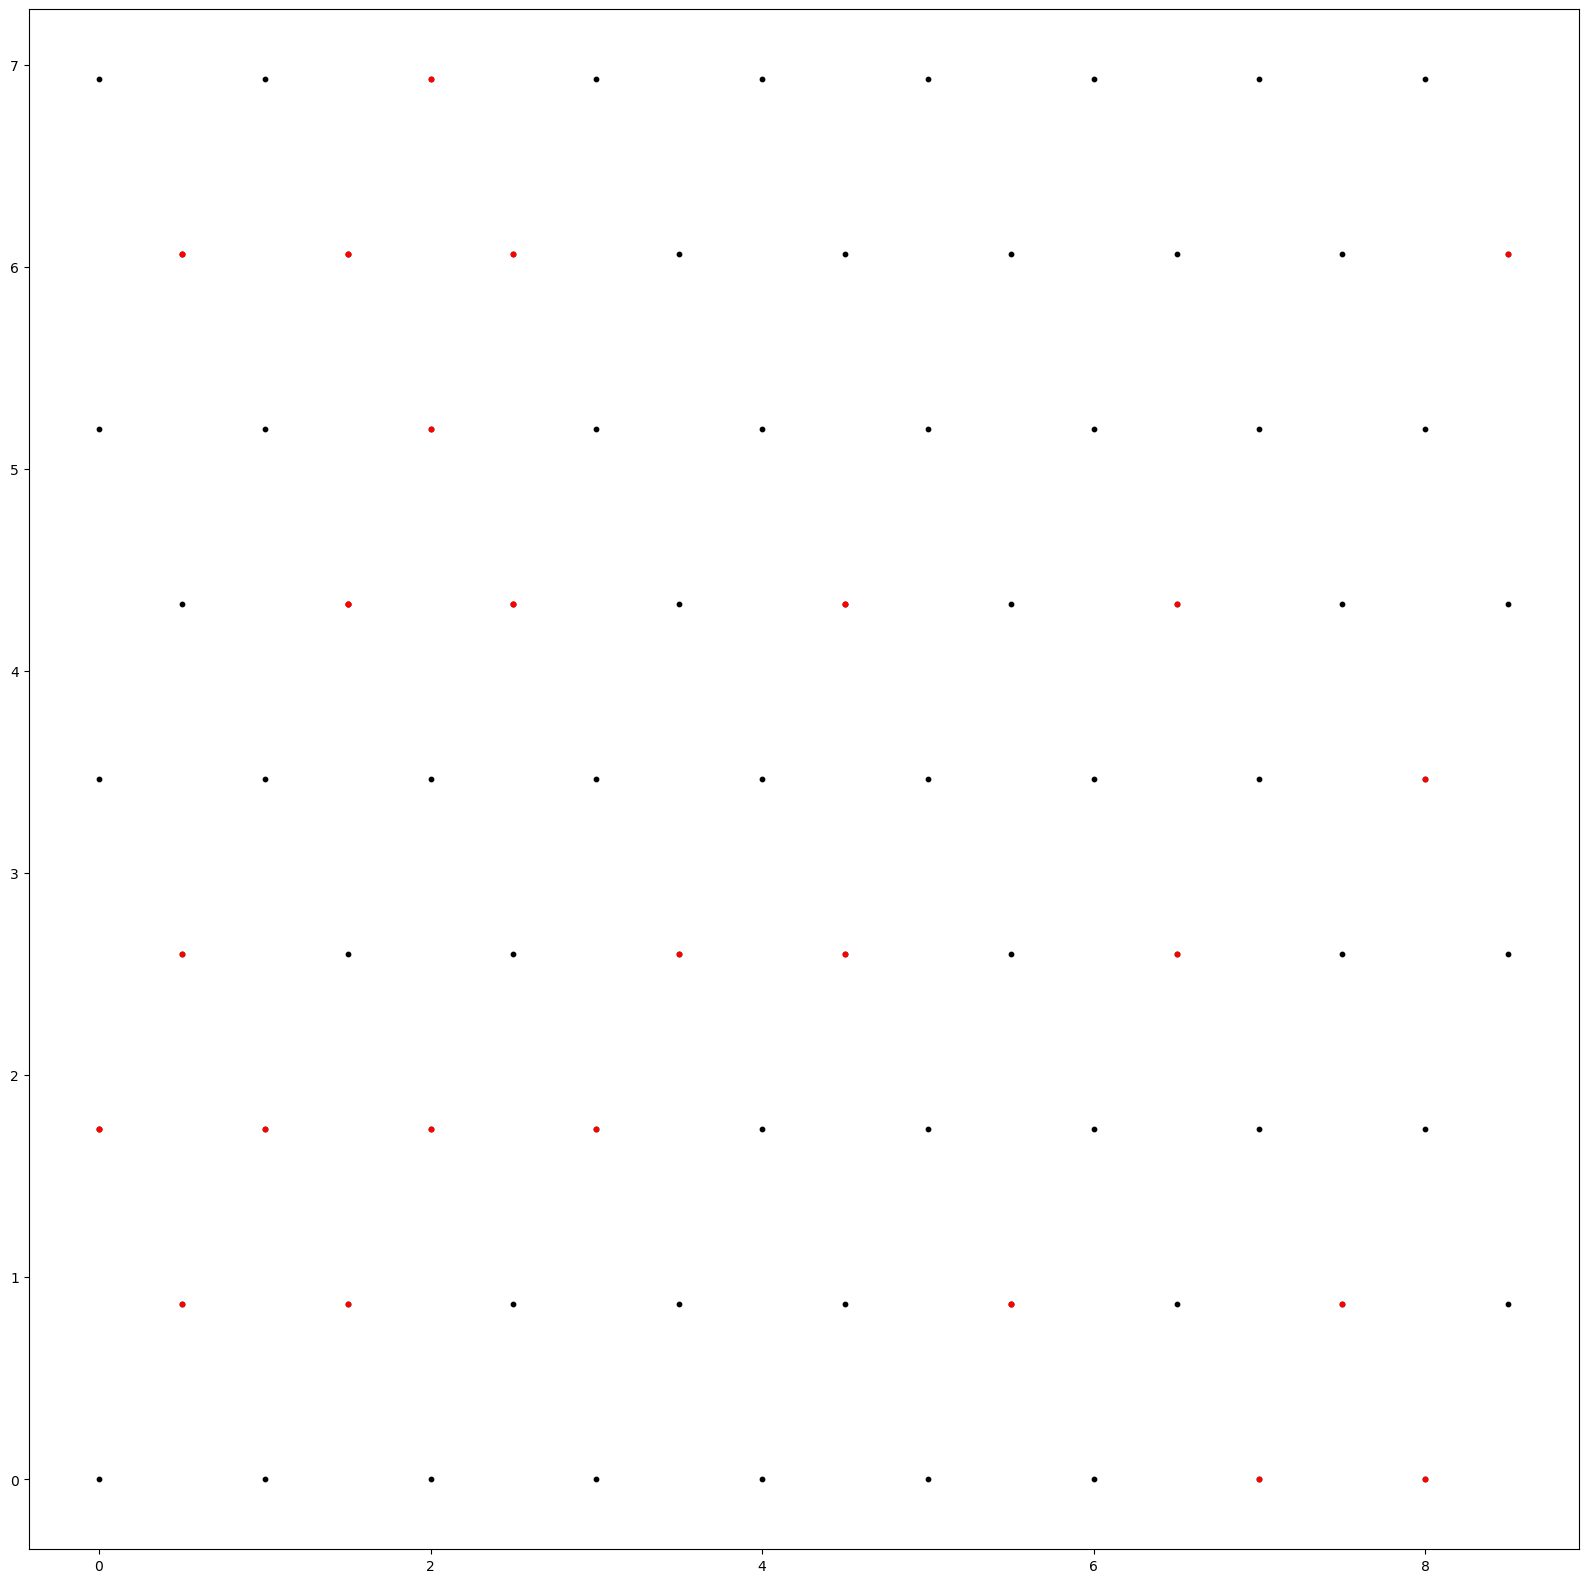

In [5]:


# Generate the neuron array
neuron_array = create_neuron_array(N)


# Generate assemblies
assemblies = []
for i in range(params_assembly_num):
    # Choose a centre from a uniform distribution
    params_distruibution_centre = np.random.uniform(0, 8, size=2)
    # Choose a standard deviation from a uniform distribution
    params_distribution_std_dev = np.random.uniform(3.5, 4.5, size=2)
    assembly = create_assembly(neuron_array,params_assembly_density ,params_distruibution_centre, 1)
    assemblies.append(assembly)

# Plot the neuron array and assemblies
plt.figure(figsize=(20, 20))
plt.scatter(neuron_array[:, 0], neuron_array[:, 1], color='black', s=10)
for assembly in assemblies:
    plt.scatter(assembly[:, 0], assembly[:, 1], color='red', s=10)
plt.show()



## Simulation of population calcium fluorescence activity

### Assign firing rate for each neuron
    1. Every neuron have a background firing rate independently and uniformly from range R
    2. At each time t, every neuron n had a probability 


In [6]:
# First, generate a dictionary mapping neuron coordinates to indices
coord_to_index = {tuple(coord): i for i, coord in enumerate(neuron_array)}

neuron_array_coord = neuron_array
assemblies_coord = assemblies

# Then, replace the coordinates in the neuron_array with indices
neuron_array = np.array([coord_to_index[tuple(coord)] for coord in neuron_array_coord])



# Finally, replace the coordinates in the assemblies with indices
for i in range(len(assemblies)):
    assemblies[i] = [coord_to_index[tuple(coord)] for coord in assemblies_coord[i] if tuple(coord) in coord_to_index]

print("Neuron array: ", neuron_array)
print("Assemblies: ", assemblies)

Neuron array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]
Assemblies:  [[33, 71, 44], [74, 65, 64], [47, 56, 47], [31, 14, 14], [51, 49, 30, 49], [21, 10, 18], [27, 46, 46, 20], [9, 19, 18], [7, 8, 16], [64, 63, 63, 46]]


In [7]:
import numpy as np
from scipy.stats import poisson

def generateSpikeCountField(N, T, dT, assemblies, rateRange, eventDur, eventProb, eventMult):
    
    """
    Function to generate spike count for a given set of parameters.
    N: Number of neurons
    T: Number of time steps
    dT: Width of a time step in units of seconds
    assemblies: List of collections of units to be combined to assemblies
    rateRange: Range of base firing rate in units of inverse seconds (Hertz)
    eventDur: Length of an active event as a number of timesteps
    eventProb: Probability with which a unit is particularly active in a single timestep
    eventMult: Firing rate multiplier at active events
    """
    
    # Initialization
    fire_rate_background = np.random.uniform(rateRange[0], rateRange[1], size=(T, N))
    activation_field = np.zeros((T, N), dtype=bool)

    # Generate activation for each assembly and each neuron
    for t in range(T):
        for assembly in assemblies:
            # If any neuron in this assembly is activated, all neurons in this assembly are activated 
            if np.any(np.random.rand(len(assembly)) < eventProb):
                activation_field[t, assembly] = True
        # For neurons not in any assembly, they are activated independently
        not_in_assembly = np.setdiff1d(np.arange(N), np.concatenate(assemblies))
        activation_field[t, not_in_assembly] = np.random.rand(len(not_in_assembly)) < eventProb

    # If neuron is activated at a timestep, its firing rate is increased by eventMult times
    fire_rate = np.where(activation_field, fire_rate_background * eventMult, fire_rate_background)
    # Generate Poisson spike count for each neuron at each timestep
    spike_count = np.random.poisson(fire_rate * dT)
    
    return spike_count


In [8]:
import csv
# Length of an active event as a number of timesteps
eventDur = np.random.randint(1, 10)

# Probability with which a unit is particularly active in a single timestep
eventProb = np.random.uniform(0.01, 0.05)

# Firing rate multiplier at active events
eventMult = np.random.uniform(6, 10)  # random number between 1 and 5

print(f'eventDur: {eventDur}, eventProb: {eventProb}, eventMult: {eventMult}')

spikeCount = generateSpikeCountField(N, T, dT, assemblies, (1, 6), eventDur, eventProb, eventMult)

csvfile = open('spikeCount.csv', 'w')
writer = csv.writer(csvfile)
writer.writerows(spikeCount)

print(spikeCount.shape)
print(spikeCount)

eventDur: 5, eventProb: 0.046361649890177145, eventMult: 9.971977549512644
(3600, 81)
[[ 1  2  2 ...  0  2  1]
 [ 1  2 37 ...  2  2  1]
 [ 0  0  1 ...  4  1  1]
 ...
 [ 0  2  2 ...  1  1  2]
 [ 3  3  2 ...  1  1  3]
 [ 1  2  0 ...  0  3  2]]


In [9]:
for assembly in assemblies:
    print(assembly)
    print(np.random.rand(len(assembly)))
    print(np.random.rand(len(assembly)) < eventProb)

[33, 71, 44]
[0.59939884 0.02127266 0.45798415]
[False False  True]
[74, 65, 64]
[0.40048807 0.17714345 0.95093841]
[ True False False]
[47, 56, 47]
[0.25977014 0.96292755 0.63129702]
[False False False]
[31, 14, 14]
[0.74688078 0.73834136 0.66072773]
[False False False]
[51, 49, 30, 49]
[0.20716848 0.83370047 0.86466843 0.50375637]
[False False False  True]
[21, 10, 18]
[0.97396427 0.57474303 0.96777111]
[False  True False]
[27, 46, 46, 20]
[0.26385215 0.37275328 0.44865064 0.60937146]
[False False False  True]
[9, 19, 18]
[0.40824689 0.32224012 0.25239001]
[False False False]
[7, 8, 16]
[0.68074965 0.53246451 0.88801605]
[False False  True]
[64, 63, 63, 46]
[0.21269095 0.47074327 0.81334526 0.89534135]
[False False False False]
